In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')

In [3]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [4]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


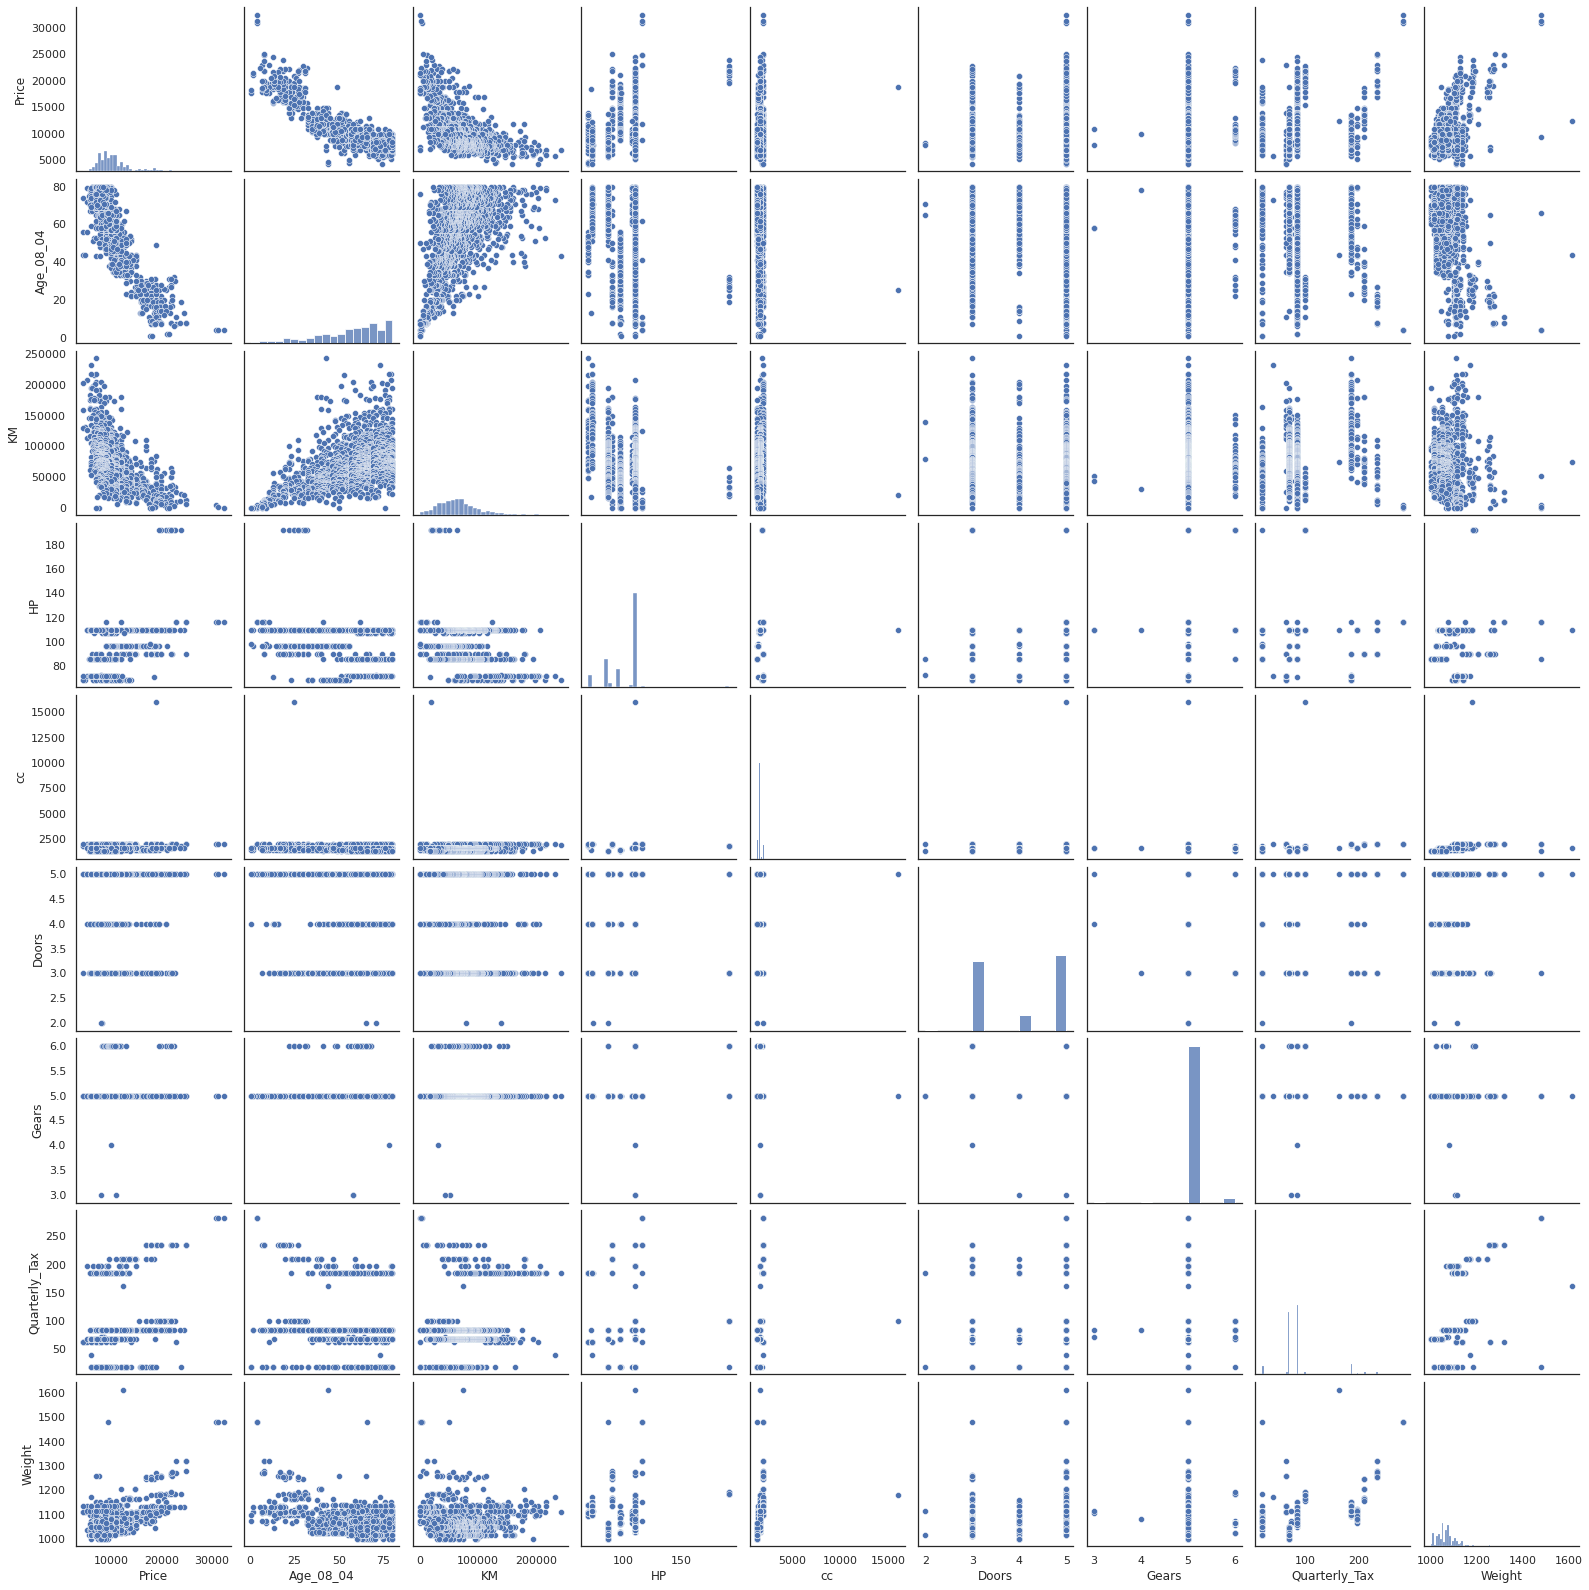

In [5]:
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
sns.pairplot(df)

### Linearity Check:

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


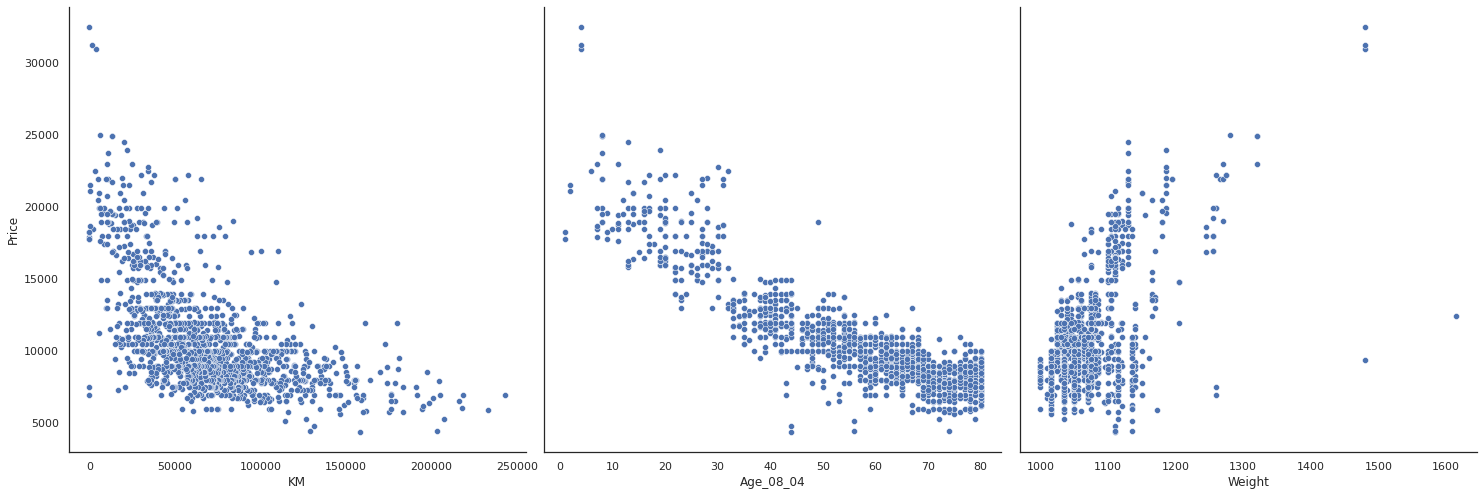

In [6]:
sns.pairplot(df,x_vars=['KM','Age_08_04','Weight'],y_vars='Price',size=7)

#### from above we can conclude that Dependent feature is not linear with independent features which concludes data do not follow Homoscadasity. Km and Age are somewhat follow same pattern but not the weight.

### QQ plot for Normality check

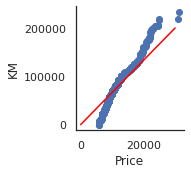

In [7]:
from seaborn_qqplot import pplot
p=pplot(df, x="Price", y="KM", kind='qq')
_=sns.lineplot(x=[0,30000],y=[0,200000],color='red')

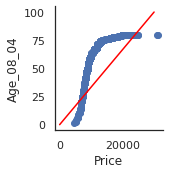

In [8]:
from seaborn_qqplot import pplot
p=pplot(df, x="Price", y="Age_08_04", kind='qq')
_=sns.lineplot(x=[0,30000],y=[0,100],color='red')

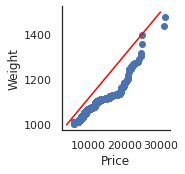

In [9]:
from seaborn_qqplot import pplot
p=pplot(df, x="Price", y="Weight", kind='qq')
_=sns.lineplot(x=[4000,30000],y=[1000,1500],color='red')

#### Age is not normal with Price

In [10]:
from scipy import stats
df.Age_08_04,_=stats.boxcox(df.Age_08_04)

In [11]:
df.Age_08_04=df.Age_08_04**(1/1.2)

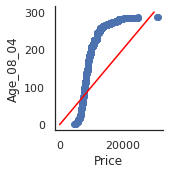

In [12]:
from seaborn_qqplot import pplot
p=pplot(df, x="Price", y="Age_08_04", kind='qq')
_=sns.lineplot(x=[0,30000],y=[0,300],color='red')

#### Tried Boxcox and Exponential transformation but normality stays as is

### Correlation between columns:

<AxesSubplot:>

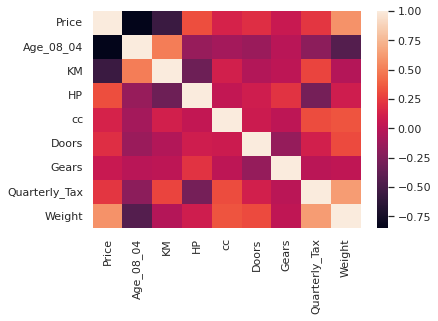

In [13]:
sns.heatmap(df.corr())

#### Little to no multicollinearity is there between dependent columns

### Model fitting and predictions:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
xTrain,xTest,yTrain,yTest=train_test_split(df.drop(['Price','Weight'],axis=1),df.Price,random_state=42)

In [16]:
linearreg=LinearRegression()
linearreg.fit(xTrain,yTrain)

LinearRegression()

In [17]:
linearreg.score(xTrain,yTrain)

0.8127036718342739

In [18]:
linearreg.score(xTest,yTest)

0.8073877990261473

In [19]:
y_pred=linearreg.predict(xTest)
mean_residual=(yTest-y_pred).mean()
mean_residual

-113.63930952022349

#### Mean of residuals is not close to zero which indicates that predictions are Heteroscadastic

In [20]:
pd.DataFrame(y_pred,yTest)

,0
Price,
10800,12048.933930
9950,9041.299786
7500,9505.264757
9250,9071.120099
9750,9341.042788
...,...
5950,7796.083866
15950,15407.244537
8250,7000.718582


### Residual plot for Train data:

In [21]:
train_res=linearreg.predict(xTrain)-yTrain

<AxesSubplot:ylabel='Price'>

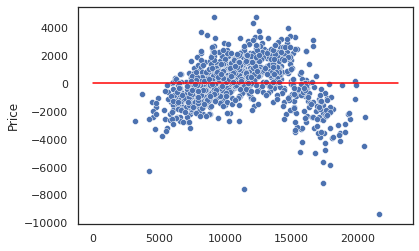

In [22]:
sns.scatterplot(x=linearreg.predict(xTrain),y=train_res)
sns.lineplot(x=[0,23000],y=[0,0],color='red')


#### Residual graph is not homoscadascous

In [23]:
train_res[train_res<-5500].index.values

array([ 147,  171,  138,  523,  110, 1058])

In [24]:
xTrain=xTrain.drop(train_res[train_res<-5500].index.values)
yTrain=yTrain.drop(train_res[train_res<-5500].index.values)

In [25]:
model=linearreg.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.8061028623492521

In [26]:
model.score(xTrain,yTrain)

0.8221635556167917

### Residual plot check after outlier deletion

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

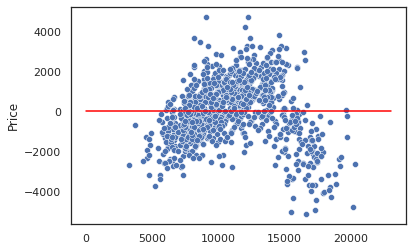

In [27]:
sns.scatterplot(x=model.predict(xTrain),y=(model.predict(xTrain)-yTrain))
sns.lineplot([0,23000],[0,0],color='red')


In [28]:
(model.predict(xTrain)-yTrain).mean()

-2.3004865986021125e-12

### Residual plot for Test Data

In [29]:
y_pred_test=model.predict(xTest)

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

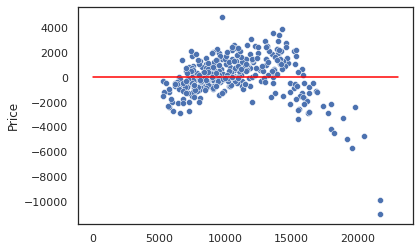

In [30]:
sns.scatterplot(x=y_pred,y=(y_pred_test-yTest))
sns.lineplot([0,23000],[0,0],color='red')


In [31]:
dp=(model.predict(xTest)-yTest)

In [32]:
dp[dp<-8000].index.values

array([111, 109])

In [33]:
xTest=xTest.drop(dp[dp<-8000].index.values)
yTest=yTest.drop(dp[dp<-8000].index.values)

### Residual plot after outlier deletion:

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

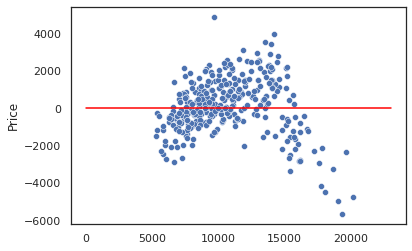

In [34]:
sns.scatterplot(x=model.predict(xTest),y=(model.predict(xTest)-yTest))
sns.lineplot([0,23000],[0,0],color='red')


In [35]:
model.score(xTest,yTest)

0.8165234315406193

#### Score increased after outlier deletion!

#### Mean of the Residuals for test:

In [36]:
(model.predict(xTest)-yTest).mean()

133.4986936673359

### Feature influence plot

<AxesSubplot:>

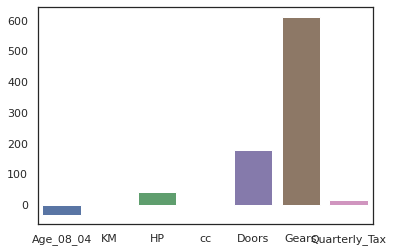

In [37]:
sns.barplot(x=df.drop(columns=['Price','Weight'],axis=1).columns.values,y=model.coef_)

### Normal plot for Residuals:

In [38]:
test_res=model.predict(xTest)-yTest

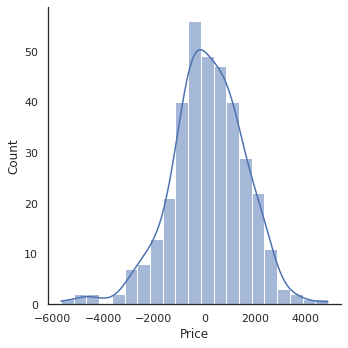

In [39]:
sns.displot(test_res,kde=True)

#### Residual Normality plot looks Normal.

<AxesSubplot:ylabel='Price'>

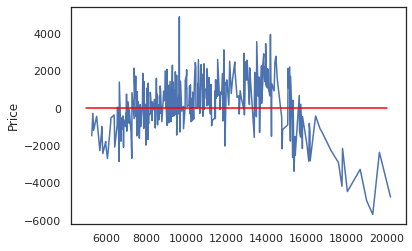

In [40]:
sns.lineplot(x=model.predict(xTest),y=model.predict(xTest)-yTest)
sns.lineplot(x=[5000,20000],y=[0,0],color='red')

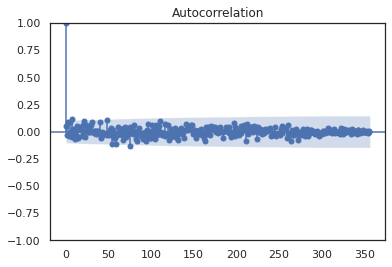

In [41]:
import statsmodels.api as sm

_=sm.graphics.tsa.plot_acf(model.predict(xTest)-yTest, lags=len(model.predict(xTest)-yTest)-1)

/home/vikrant/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


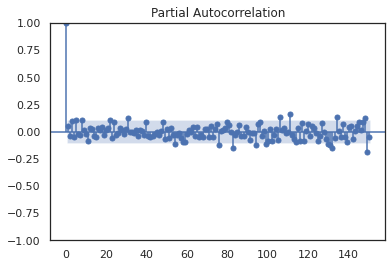

In [42]:
_=sm.graphics.tsa.plot_pacf(model.predict(xTest)-yTest, lags=150)

#### From above we can see little autocorrelation might be present in data which signifies seasonality of data

### Feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xTest=sc.fit_transform(xTest)
yTest=sc.fit_transform(np.array(yTest).reshape(-1,1))
xTrain=sc.fit_transform(xTrain)
yTrain=sc.fit_transform(np.array(yTrain).reshape(-1,1))

In [44]:
np.array(yTrain).reshape(-1,1).shape

(1071, 1)

In [45]:
xTrain.shape

(1071, 7)

In [46]:
scaled_model=linearreg.fit(xTrain,yTrain)
scaled_model.score(xTest,yTest)

0.8173682188092708

#### Scaling helped to increase score

In [71]:
rawdf=pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')

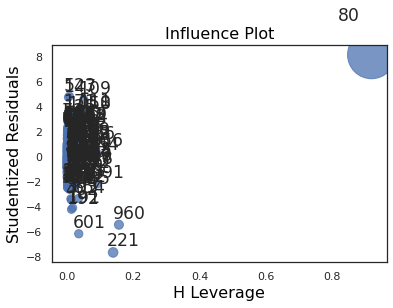

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=rawdf).fit()
_=sm.graphics.influence_plot(model)

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:13   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
rawdf=rawdf.drop(80)

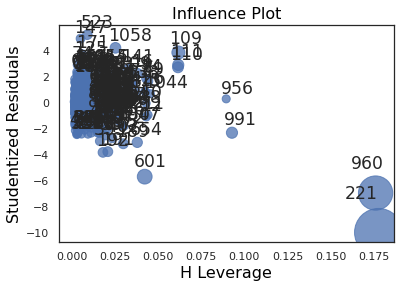

In [75]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=rawdf).fit()
_=sm.graphics.influence_plot(model)

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:19   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
rawdf=rawdf.drop([221,960])

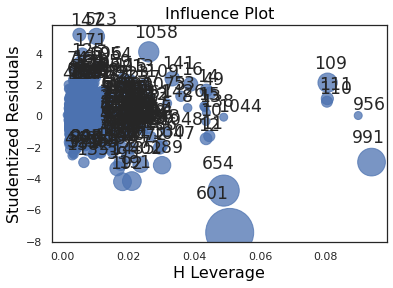

In [78]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=rawdf).fit()
_=sm.graphics.influence_plot(model)

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:01:24   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
train,test=train_test_split(rawdf,random_state=42)

In [81]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train).fit()
preds=model.predict(test.drop('Price',axis=1))

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

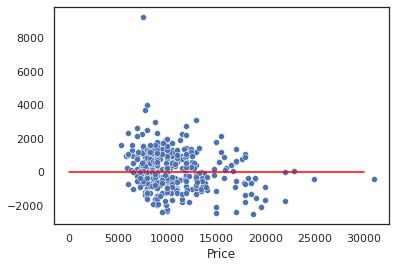

In [82]:
sns.scatterplot(y=preds-test.Price,x=test.Price)
sns.lineplot([0,30000],[0,0],color='red')

In [83]:
p=preds-test.Price

In [84]:
p[p>8000]

601    9255.970083
dtype: float64

In [85]:
test=test.drop(601)

In [86]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train).fit()
preds=model.predict(test.drop('Price',axis=1))

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

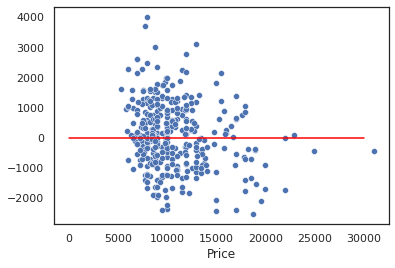

In [87]:
sns.scatterplot(y=preds-test.Price,x=test.Price)
sns.lineplot([0,30000],[0,0],color='red')

In [88]:
np.sqrt(np.mean((preds-test.Price)*(preds-test.Price)))

1103.7510925513195

In [94]:
test=test.drop(test[test.KM<10].index)

In [95]:
train=train.drop(train[train.KM<10].index)
model_f=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=train).fit()
preds_f=model_f.predict(test.drop('Price',axis=1))

/home/vikrant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

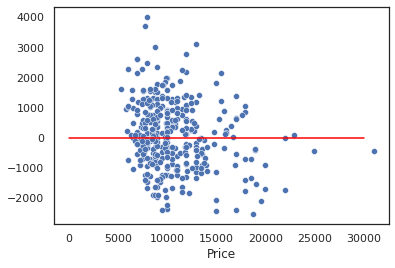

In [96]:
sns.scatterplot(y=preds-test.Price,x=test.Price)
sns.lineplot([0,30000],[0,0],color='red')

In [97]:
np.sqrt(np.mean((preds-test.Price)*(preds-test.Price)))

1106.1586410325547